In [2]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [7]:
#resnet101
model = VGG16(weights= 'imagenet', include_top=False, input_tensor=None, input_shape=(224,224,3))

58892288/58889256 [==============================] - 2s 0us/step


In [8]:
#adding new layers
x = model.output  
x = Flatten()(x)
# let's add a fully-connected layer
x = Dense(512,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512,activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(4, activation='softmax')(x)
#add logistic layer
predictions = Dense(4, activation='softmax')(x)
#model to train
model = Model(input=model.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:
for layer in model.layers[:-7]: 
    layer.trainable = False

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [11]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 240s 2s/step - loss: 1.4344 - acc: 0.1985 - val_loss: 1.4175 - val_acc: 0.2250
Epoch 2/25
100/100 [==============================] - 42s 420ms/step - loss: 1.4169 - acc: 0.2249 - val_loss: 1.3842 - val_acc: 0.2329
Epoch 3/25
100/100 [==============================] - 15s 150ms/step - loss: 1.4123 - acc: 0.2350 - val_loss: 1.1748 - val_acc: 0.2603
Epoch 4/25
100/100 [==============================] - 14s 136ms/step - loss: 1.3846 - acc: 0.2839 - val_loss: 1.3442 - val_acc: 0.2875
Epoch 5/25
100/100 [==============================] - 15s 148ms/step - loss: 1.3939 - acc: 0.2664 - val_loss: 1.3580 - val_acc: 0.2603
Epoch 6/25
100/100 [==============================] - 14s 145ms/step - loss: 1.3790 - acc: 0.2988 - val_loss: 1.3138 - val_acc: 0.3699
Epoch 7/25
100/100 [==============================] - 15s 148ms/step - loss: 1.3859 - acc: 0.2952 - val_loss: 1.4673 - val_acc: 0.3500
Epoch 8/25
100/100 [==============================] - 15s

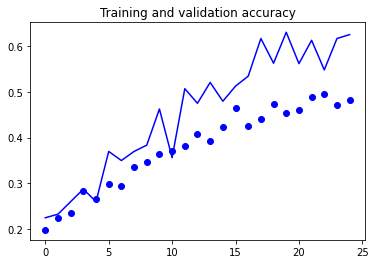

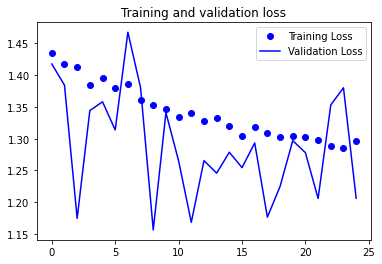

In [12]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()